In [1]:
%load_ext google.cloud.bigquery

In [2]:
import os
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = r"C:\Users\samer\Documents\challange\code-challenges\datascience\samer-essa-95ac44d43156.json"

# "Will it snow tomorrow?" - The time traveler asked
The following dataset contains climate information from over 9000 stations accross the world. The overall goal of these subtasks will be to predict whether it will snow tomorrow 14 years ago. So if today is 2023.10.27 then the weather we want to forecast is for the date 2009.10.28. You are supposed to solve the tasks using Big Query, which can be used in the Jupyter Notebook like it is shown in the following cell. For further information and how to use BigQuery in Jupyter Notebook refer to the Google Docs. 

The goal of this test is to test your coding knowledge in Python, BigQuery and Pandas as well as your understanding of Data Science. If you get stuck in the first part, you can use the replacement data provided in the second part

In [3]:
%%bigquery 
SELECT *
FROM `bigquery-public-data.samples.gsod`
LIMIT 20 


Query is running:   0%|          |

Downloading:   0%|          |

,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,37950,99999,1929,12,5,48.700001,4,45.500000,4,992.299988,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
1,31590,99999,1929,10,2,50.200001,4,46.299999,4,987.000000,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
2,38640,99999,1929,10,1,55.000000,4,44.700001,4,1015.299988,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
3,38110,99999,1929,12,8,48.700001,4,41.700001,4,993.900024,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
4,30050,99999,1929,12,27,42.500000,4,37.700001,4,991.200012,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
5,38110,99999,1929,10,4,53.299999,4,43.500000,4,1008.700012,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
6,38560,99999,1929,10,20,52.000000,4,42.299999,4,995.500000,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
7,30910,99999,1929,10,4,43.799999,4,NaN,<NA>,1002.700012,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
8,38940,99999,1929,11,11,50.799999,4,48.000000,4,1016.299988,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
9,38640,99999,1929,11,1,44.700001,4,37.700001,4,1029.400024,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False


## Part 1

### 1. Task
Change the date format to 'YYYY-MM-DD' and select the data from 2005 till 2009 for station numbers including and between 725300 and 726300 , and save it as a pandas dataframe. Note the maximum year available is 2010. 

In [4]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 100)
from collections import Counter 
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

- assignes the output of the SQL query to a dataframe typepandas called "df_weather"

In [5]:
%%bigquery df_weather
SELECT  *,
FROM `bigquery-public-data.samples.gsod`
WHERE (year BETWEEN 2005 AND 2009) 
    AND (station_number BETWEEN 725300 AND 726300)


Query is running:   0%|          |

Downloading:   0%|          |

In [6]:
df_weather['date'] = pd.to_datetime(df_weather[['year', 'month', 'day']])
df_weather.sample(5)

,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,num_mean_sealevel_pressure_samples,mean_station_pressure,num_mean_station_pressure_samples,mean_visibility,num_mean_visibility_samples,mean_wind_speed,num_mean_wind_speed_samples,max_sustained_wind_speed,max_gust_wind_speed,max_temperature,max_temperature_explicit,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado,date
229465,725624,99999,2008,6,23,71.199997,24,58.799999,24,NaN,<NA>,NaN,<NA>,10.0,24,9.8,24,18.1,22.9,60.799999,True,NaN,<NA>,0.00,NaN,False,False,False,False,False,False,2008-06-23
50893,726185,14605,2007,8,21,59.700001,24,47.000000,24,1024.400024,24,NaN,<NA>,10.0,24,3.0,24,6.0,NaN,48.000000,False,NaN,<NA>,0.01,NaN,False,False,False,False,False,False,2007-08-21
341309,725556,94975,2009,9,8,71.699997,24,61.099998,24,NaN,<NA>,NaN,<NA>,8.6,24,12.9,24,18.1,28.9,62.599998,True,NaN,<NA>,0.00,NaN,False,False,False,False,False,False,2009-09-08
147072,725650,3017,2008,8,8,68.199997,24,57.900002,24,1013.500000,24,NaN,<NA>,9.1,24,5.4,24,13.0,NaN,60.099998,False,NaN,<NA>,0.00,NaN,True,True,True,True,True,True,2008-08-08
125462,725370,94847,2005,7,2,65.000000,24,49.700001,24,1014.900024,24,991.299988,24,10.0,24,6.6,24,14.0,NaN,54.000000,False,NaN,<NA>,0.00,NaN,False,False,False,False,False,False,2005-07-02


### 2. Task 
From here you want to work with the data from all stations 725300 to 725330 that have information from 2005 till 2009. 

In [237]:
df_weather.shape

(377784, 32)

In [326]:
df_weather_sm = df_weather[(df_weather['station_number'] >= 725300) & (df_weather['station_number'] <= 725330)]
## print the min and max range of station_number - just to make sure it matches the required interval
print(df_weather_sm.station_number.min(), df_weather_sm.station_number.max(), df_weather_sm.shape)


725300 725330 (18129, 32)


Do a first analysis of the remaining dataset, clean or drop data depending on how you see appropriate. 

In [327]:
df_for_preprocessing = df_weather_sm.copy()

## we have 32 columns, next i will check which we need and which we dont need
df_for_preprocessing.describe()

,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,num_mean_sealevel_pressure_samples,mean_station_pressure,num_mean_station_pressure_samples,mean_visibility,num_mean_visibility_samples,mean_wind_speed,num_mean_wind_speed_samples,max_sustained_wind_speed,max_gust_wind_speed,max_temperature,max_temperature_explicit,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
count,18129.000000,18129.000000,18129.000000,18129.000000,18129.000000,18129.000000,18129.000000,18127.000000,18127.000000,16291.000000,16291.000000,993.000000,993.000000,18126.000000,18126.000000,18124.000000,18124.000000,18119.000000,11468.000000,18127.000000,18127,0.0,0,17938.000000,565.000000,18129,18129,18129,18129,18129,18129
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,0,NaN,NaN,2,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,False,False,False,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10566,NaN,NaN,NaN,NaN,15987,15987,15987,15987,15987,15987
mean,725316.962050,72766.474488,2007.001103,6.527884,15.721000,51.999636,23.574163,41.605108,23.553704,1016.937585,21.682217,990.766767,23.309164,8.699388,23.565155,7.495834,23.528195,14.049412,23.153270,42.580692,NaN,NaN,NaN,0.095488,2.865133,NaN,NaN,NaN,NaN,NaN,NaN
std,8.979529,39561.090384,1.413667,3.451484,8.803705,19.392603,1.817230,18.494937,1.857548,6.920370,3.198832,7.302087,2.276299,1.730177,1.829544,3.581758,1.928344,5.241219,6.382058,18.646582,NaN,NaN,NaN,0.279290,2.105886,NaN,NaN,NaN,NaN,NaN,NaN
min,725300.000000,3887.000000,2005.000000,1.000000,1.000000,-16.200001,4.000000,-23.500000,4.000000,985.299988,4.000000,967.599976,4.000000,0.600000,4.000000,0.000000,4.000000,2.900000,11.100000,-34.599998,NaN,NaN,NaN,0.000000,1.200000,NaN,NaN,NaN,NaN,NaN,NaN
25%,725314.000000,14842.000000,2006.000000,4.000000,8.000000,36.299999,24.000000,27.500000,24.000000,1012.799988,20.000000,986.400024,24.000000,7.900000,24.000000,4.800000,24.000000,9.900000,18.100000,28.400000,NaN,NaN,NaN,0.000000,1.200000,NaN,NaN,NaN,NaN,NaN,NaN
50%,725316.000000,99999.000000,2007.000000,7.000000,16.000000,53.799999,24.000000,42.599998,24.000000,1016.700012,23.000000,990.700012,24.000000,9.500000,24.000000,7.000000,24.000000,13.000000,22.000000,44.099998,NaN,NaN,NaN,0.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,725326.000000,99999.000000,2008.000000,10.000000,23.000000,69.099998,24.000000,57.200001,24.000000,1020.900024,24.000000,995.000000,24.000000,10.000000,24.000000,9.600000,24.000000,16.900000,27.000000,57.900002,NaN,NaN,NaN,0.040000,3.900000,NaN,NaN,NaN,NaN,NaN,NaN


### i will drop the column that contain information about num mean samples!
- remove : num_mean_temp_samples, num_mean_dew_point_samples, num_mean_sealevel_pressure_samples, num_mean_visibility_samples
- remove : num_mean_wind_speed_samples, num_mean_station_pressure_samples


In [328]:
df_for_preprocessing.drop(columns=['num_mean_temp_samples', 'num_mean_dew_point_samples', 'num_mean_sealevel_pressure_samples', 'num_mean_visibility_samples',
    'num_mean_wind_speed_samples', 'num_mean_station_pressure_samples'], inplace=True)
df_for_preprocessing.shape

(18129, 26)

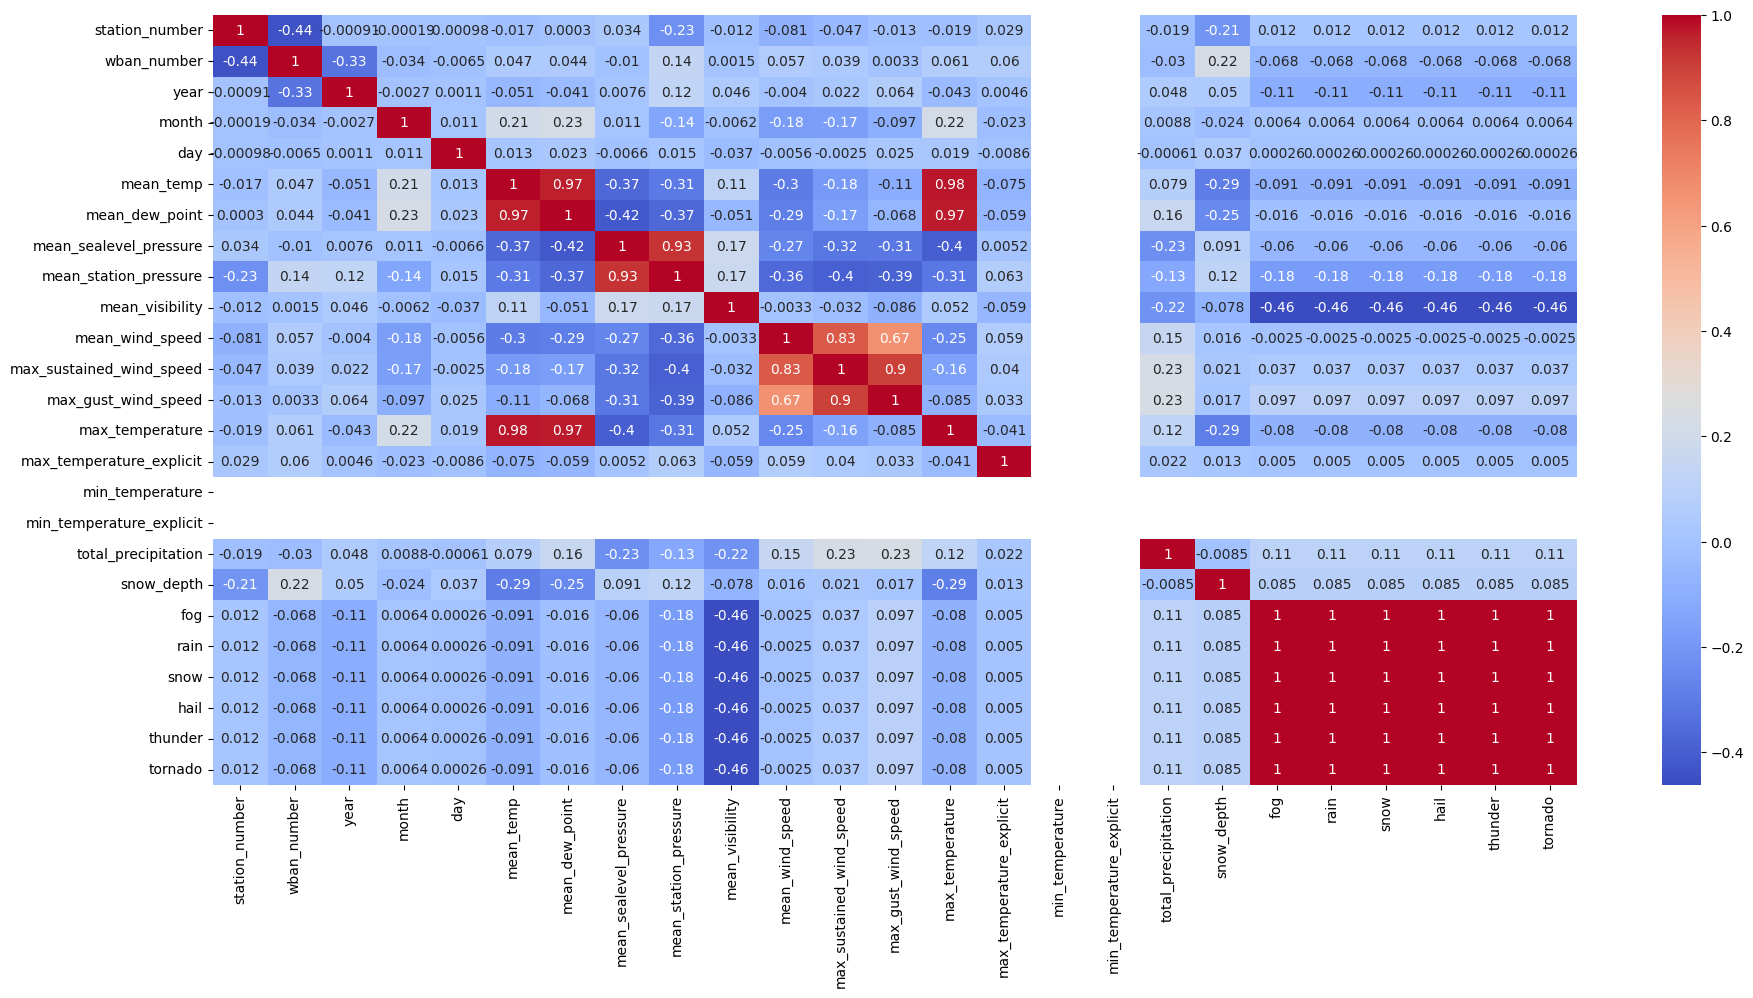

In [329]:
## now that the number of column is less:
plt.figure(figsize=(22, 10))

sns.heatmap(df_for_preprocessing.corr(), cmap='coolwarm', annot=True)
plt.show()

In [330]:
## check for each column the percentage of missing values (Nan) to help make a decision which columns
## can be droped safely

missing_values_percentage = df_for_preprocessing.isna().sum(axis=0) * 100/len(df_for_preprocessing)
print(missing_values_percentage)

station_number                0.000000
wban_number                   0.000000
year                          0.000000
month                         0.000000
day                           0.000000
mean_temp                     0.000000
mean_dew_point                0.011032
mean_sealevel_pressure       10.138452
mean_station_pressure        94.522588
mean_visibility               0.016548
mean_wind_speed               0.027580
max_sustained_wind_speed      0.055160
max_gust_wind_speed          36.742236
max_temperature               0.011032
max_temperature_explicit      0.011032
min_temperature             100.000000
min_temperature_explicit    100.000000
total_precipitation           1.053561
snow_depth                   96.883446
fog                           0.000000
rain                          0.000000
snow                          0.000000
hail                          0.000000
thunder                       0.000000
tornado                       0.000000
date                     

In [331]:
## seems like some column has a huge amount of nan, hence i will discard them from further preprocessing 
## (columns with more than 11% Nan are droped -)
columns_to_keep = missing_values_percentage[missing_values_percentage <= 11].index
print("columns to consider: ", columns_to_keep)

columns to consider:  Index(['station_number', 'wban_number', 'year', 'month', 'day', 'mean_temp',
       'mean_dew_point', 'mean_sealevel_pressure', 'mean_visibility',
       'mean_wind_speed', 'max_sustained_wind_speed', 'max_temperature',
       'max_temperature_explicit', 'total_precipitation', 'fog', 'rain',
       'snow', 'hail', 'thunder', 'tornado', 'date'],
      dtype='object')


columns with num_mean... are not needed 
- remove : num_mean_temp_samples, num_mean_dew_point_samples, num_mean_sealevel_pressure_samples, num_mean_visibility_samples
- remove : num_mean_wind_speed_samples. and max_temperature_explicit does not provide me with useful info my opinion 
- We already have a date column of type datetime so we wont need "year", "day", "month"

In [332]:
## first relevant columns are these:
## later i will also remove: 'fog', 'rain', 'snow', 'hail', 'thunder', 'tornado'
## because when training the model later, i would get perfect predictions (or overfitting)
## , 'wban_number',  'max_temperature_explicit',
relevant_columns = ['date', 'station_number', 'mean_temp',
       'mean_dew_point', 'mean_sealevel_pressure',
       'mean_visibility', 'mean_wind_speed', 'max_sustained_wind_speed',
       'max_temperature', 'total_precipitation', 
       'snow']
df_for_preprocessing = df_for_preprocessing[relevant_columns]
print(df_for_preprocessing.shape)

(18129, 11)


Now we have a dataframe with the relevant columns.\
Some column still contain Nan, to deal with them we could: \
    - replace Nan with the previsous value in the dataframe\
    - repalce Nan with 0 or mean of the column/ or based on month\
    - or drop rows with Nan\
Since our dataset does not contain too many Nan values, and it showed also in the next part that the prediction it pretty well\
I decided to drop the Nan Values 

In [333]:
df_for_preprocessing.dropna(inplace=True)
df_for_preprocessing = df_for_preprocessing.reset_index(drop=True)
print(df_for_preprocessing.shape)
df_for_preprocessing.head(3)

(16103, 11)


,date,station_number,mean_temp,mean_dew_point,mean_sealevel_pressure,mean_visibility,mean_wind_speed,max_sustained_wind_speed,max_temperature,total_precipitation,snow
0,2005-10-04,725316,76.699997,66.500000,1021.400024,8.4,6.4,11.1,69.800003,0.00,False
1,2005-10-06,725316,61.000000,46.900002,1019.299988,10.0,10.9,18.1,51.099998,0.00,False
2,2005-01-29,725314,33.299999,29.900000,1023.099976,4.4,2.8,8.0,32.000000,0.29,True


In [334]:
## change the Boolean values to 0 and 1 (for snow column)
## set the date column as index and then move to splitting the dataset for training
df_for_preprocessing['snow'] = df_for_preprocessing['snow'].astype(int)
df_for_preprocessing.head(3)

,date,station_number,mean_temp,mean_dew_point,mean_sealevel_pressure,mean_visibility,mean_wind_speed,max_sustained_wind_speed,max_temperature,total_precipitation,snow
0,2005-10-04,725316,76.699997,66.500000,1021.400024,8.4,6.4,11.1,69.800003,0.00,0
1,2005-10-06,725316,61.000000,46.900002,1019.299988,10.0,10.9,18.1,51.099998,0.00,0
2,2005-01-29,725314,33.299999,29.900000,1023.099976,4.4,2.8,8.0,32.000000,0.29,1


In [335]:
## sort values according to station and date, important when splitting data for training and test, since the sequence of 
## event in forecasting is important
df_for_preprocessing = df_for_preprocessing.sort_values(by=['date', 'station_number'], ascending=True).copy()
df_for_preprocessing.index = df_for_preprocessing.date
df_for_preprocessing.drop(columns='date', axis=1, inplace=True)
df_for_preprocessing.tail(5)

,station_number,mean_temp,mean_dew_point,mean_sealevel_pressure,mean_visibility,mean_wind_speed,max_sustained_wind_speed,max_temperature,total_precipitation,snow
date,,,,,,,,,,
2009-12-31,725316,30.299999,25.799999,1017.900024,6.0,9.0,16.9,17.100000,0.06,0
2009-12-31,725317,30.799999,29.100000,1017.900024,5.1,7.9,15.0,19.000000,0.00,0
2009-12-31,725320,27.500000,22.299999,1017.900024,5.3,7.7,13.0,14.000000,0.08,0
2009-12-31,725327,30.799999,28.400000,1016.000000,5.3,7.8,15.0,21.200001,0.00,0
2009-12-31,725330,33.299999,30.600000,1015.700012,4.4,8.1,15.0,30.000000,0.11,0


### 3. Task
Now it is time to split the data, into a training, evaluation and test set. As a reminder, the date we are trying to predict snow fall for should constitute your test set.

In [336]:
import datetime as dt

str(dt.datetime.today()- dt.timedelta(days=14*365)).split(' ')[0]

'2009-11-30'

- the date we need to predict "2009-11-29" should fall in the testing set

In [337]:
#df_for_preprocessing.tail(2)

In [338]:
## the test data is 20% of the whole data we preprocessed 
train_set, test_set = train_test_split(df_for_preprocessing, test_size=0.2, shuffle=False)
## Moreover, we also define a validation train data, for that i toke 10% of the training data as a validation data 
train_data, validation_data = train_test_split(train_set, test_size=0.2, shuffle=False)
print(train_set.shape, test_set.shape, train_data.shape, validation_data.shape)

## if you check the train_data.head() it will be the saem as train_set.head. 
## if you check validation_data.tail(), it will be the same as train_set.tail()
## the sequence of the data is very important for forecasting and it should not be shuffled

(12882, 10) (3221, 10) (10305, 10) (2577, 10)


In [374]:
#x_train_set , y_train_set = np.array(train_set.drop(columns='snow')) , np.array(train_set['snow'])
x_train , y_train = train_data.drop(columns='snow') , train_data['snow']
x_validation, y_validation = validation_data.drop(columns='snow'), validation_data['snow']
x_test, y_test =  test_set.drop(columns='snow') , test_set['snow']

In [ ]:
#x_train_set , y_train_set = np.array(train_set.drop(columns='snow')) , np.array(train_set['snow'])
x_train , y_train = np.array(train_data.drop(columns='snow')) , np.array(train_data['snow'])
x_validation, y_validation = np.array(validation_data.drop(columns='snow')), np.array(validation_data['snow'])
x_test, y_test =  np.array(test_set.drop(columns='snow')) , np.array(test_set['snow'])

In [340]:
print(x_train.shape, x_validation.shape, x_test.shape)

(10305, 9) (2577, 9) (3221, 9)


## Part 2
If you made it up to here all by yourself, you can use your prepared dataset to train an algorithm of your choice to forecast whether it will snow on the following date for each station in this dataset:

In [375]:
import datetime as dt

date_to_choose = str(dt.datetime.today()- dt.timedelta(days=14*365)).split(' ')[0]

You are allowed to use any library you are comfortable with such as sklearn, tensorflow, keras etc. 
If you did not manage to finish part one feel free to use the data provided in 'coding_challenge.csv' Note that this data does not represent a solution to Part 1. 

In [376]:
## xgboost with: 300 n_estimator (number of trees to built)
##               learning rate 0.1 
##               early stopping to stop training before overfitting or if our objective function is converging 
model = xgb.XGBRegressor(
    n_estimators=100,
    eta = 0.05,
    early_stopping_rounds=50,
    eval_metric='rmse'
    )

In [377]:
model.fit(x_train, y_train,  eval_set=[(x_validation, y_validation)])

[0]	validation_0-rmse:0.29916
[1]	validation_0-rmse:0.29575
[2]	validation_0-rmse:0.29285
[3]	validation_0-rmse:0.28957
[4]	validation_0-rmse:0.28716
[5]	validation_0-rmse:0.28475
[6]	validation_0-rmse:0.28280
[7]	validation_0-rmse:0.28083
[8]	validation_0-rmse:0.27911
[9]	validation_0-rmse:0.27772
[10]	validation_0-rmse:0.27630
[11]	validation_0-rmse:0.27469
[12]	validation_0-rmse:0.27323
[13]	validation_0-rmse:0.27192
[14]	validation_0-rmse:0.27090
[15]	validation_0-rmse:0.27004
[16]	validation_0-rmse:0.26909
[17]	validation_0-rmse:0.26838
[18]	validation_0-rmse:0.26766
[19]	validation_0-rmse:0.26709
[20]	validation_0-rmse:0.26657
[21]	validation_0-rmse:0.26596
[22]	validation_0-rmse:0.26541
[23]	validation_0-rmse:0.26516
[24]	validation_0-rmse:0.26482
[25]	validation_0-rmse:0.26449
[26]	validation_0-rmse:0.26418
[27]	validation_0-rmse:0.26388
[28]	validation_0-rmse:0.26346
[29]	validation_0-rmse:0.26318
[30]	validation_0-rmse:0.26281
[31]	validation_0-rmse:0.26280
[32]	validation_0-

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eta=0.05, eval_metric='rmse',
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

So we want to predict for 2009-11-29
we define a small function to locate the date we want to predict and we pass it to the model

In [378]:
def predict_snow_fall(model, df, date=None):
    if date is not None:
        prediction_ = model.predict(df.loc[date])
    else: 
        prediction_ = model.predict(df)
    ## threshold of 0.5 and round values to 0 and 1 for did not snow and snowed
    prediction_ = (prediction_>0.5).astype(int)
    return prediction_


In [379]:
def eval_preidction(true_values, predictions):
    print(f"MAE: {mean_absolute_error(true_values, predictions)}")
    print(f"MSE: {mean_squared_error(true_values, predictions)}")
    print(f"MAPE: {mean_absolute_percentage_error(true_values, predictions)}")
    

In [380]:
date_to_predict = '2009-11-29'
predict_snow_fall(model=model, df=x_test, date=date_to_predict)

array([1, 0, 0, 0, 0, 0, 0, 1, 0])

In [381]:
y_test.loc[date_to_predict]

date
2009-11-29    0
2009-11-29    0
2009-11-29    0
2009-11-29    0
2009-11-29    0
2009-11-29    0
2009-11-29    0
2009-11-29    1
2009-11-29    0
Name: snow, dtype: int32

In [382]:
eval_preidction(np.array(y_test.loc[date_to_predict]), predict_snow_fall(model=model, df=x_test, date='2009-11-29' ))

MAE: 0.1111111111111111
MSE: 0.1111111111111111
MAPE: 500399958596721.75


In [383]:
from sklearn.metrics import classification_report
classification_report_of_prediction = classification_report(y_test, predict_snow_fall(model=model, df=x_test))

print(classification_report_of_prediction)

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      2911
           1       0.48      0.33      0.39       310

    accuracy                           0.90      3221
   macro avg       0.71      0.65      0.67      3221
weighted avg       0.89      0.90      0.89      3221



In [384]:
## predict all of the test set
eval_preidction(y_test, predict_snow_fall(model=model, df=x_test))


MAE: 0.09872710338404223
MSE: 0.09872710338404223
MAPE: 153801912142426.16


In [385]:
## testing 
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)

LinearRegression()

In [386]:
linear_model_prediction = predict_snow_fall(lin_model, x_test)
eval_preidction(y_test, linear_model_prediction)

MAE: 0.09779571561626824
MSE: 0.09779571561626824
MAPE: 114652334506172.27


In [387]:
classification_report_of_prediction_linear_reg = classification_report(y_test, linear_model_prediction)

print(classification_report_of_prediction_linear_reg)

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      2911
           1       0.48      0.25      0.33       310

    accuracy                           0.90      3221
   macro avg       0.70      0.61      0.64      3221
weighted avg       0.88      0.90      0.89      3221

